# Reproducing Figures
All figures of the main text and supplement can be easily reproduced. This notebook provides two examples on how to create the figures.
Generally, the code for all figures can be found in `~/src/figures/`. Each figure has its own directory, which stores data needed to compile the figure, a script `evaluate_data.py` to evaulate the data needed to generate the figure and a script `XYZFigure.py`, which provides the main routine to generate the figure. By calling the method `make_figure` of each of these figure-scripts, you can retrieve the figures of the original publication and supplement.
Running this notebook locally, figures are saved in the `~/output/` directory of the repository.

## Preparation
We first import the necessary python packages and the modules to generate the figures from `src.figures`.
To avoid cluttering, we suppress all wanrings for the moment.

In [9]:
import os
import matplotlib.pyplot as plt

from lib.config import ROOT_DIR
from lib.plotting.artefacts import Figures
from src.figures.PhenomenologicalFigure import DiffLimitFigure
from src.figures.TheoryFigure import CRBFigure
from src.figures.DynamicDataFigure import RulerMovie

import warnings
warnings.filterwarnings('ignore')

Next, we define the output directory for the figures to be saved in as `~/output/`

In [10]:
out = os.path.join(ROOT_DIR,'output/')
os.makedirs(out,exist_ok=True)

## Generate Figures
We are now ready to generate the figures. We choose a certain style for the layout (in this case "nature").
In order to generate the any figure of the paper, one simply runs the `make_figure` (or `make_animation`) command of the respective figure (animation).

In [11]:
kwargs = dict(plot_style='nature', color_scheme='default',show=False)

Let's start with a fancy animation. We have measured the movement of two fluorophores attached to a rigid structure. By translating the microscope's stage, we can force the fluorophores to follow the trajectory of the stage. This results in two shifted copies of the chosen trajectory - in this case its a higher-order Lissajou figure and a circle.

We have create the animation and save it. Depending on the chosen number of frames this might take up to a minute.

In [12]:
frames = 30#desired number of frames
time_bin = 50#[ms]
ani, fps = RulerMovie.make_animation(**kwargs,frames=frames,time_bin=time_bin)

output_file = os.path.join(out,'DynamicRulerAnimationTest.gif')# Define the file name for the GIF
ani.save(output_file, writer='pillow', fps=fps, dpi=400)# Save the animation as a GIF

The resulting GIF can be found in your local `/output/` directory:

![SegmentLocal](../../../../src/figures/DynamicDataFigure/DynamicRulerAnimation.gif "segment")

Let's create the first figure of the paper illustrating the diffraction limit and contrasting a diffraction maximum vs a diffraction minimum for localization of two point scatterers.

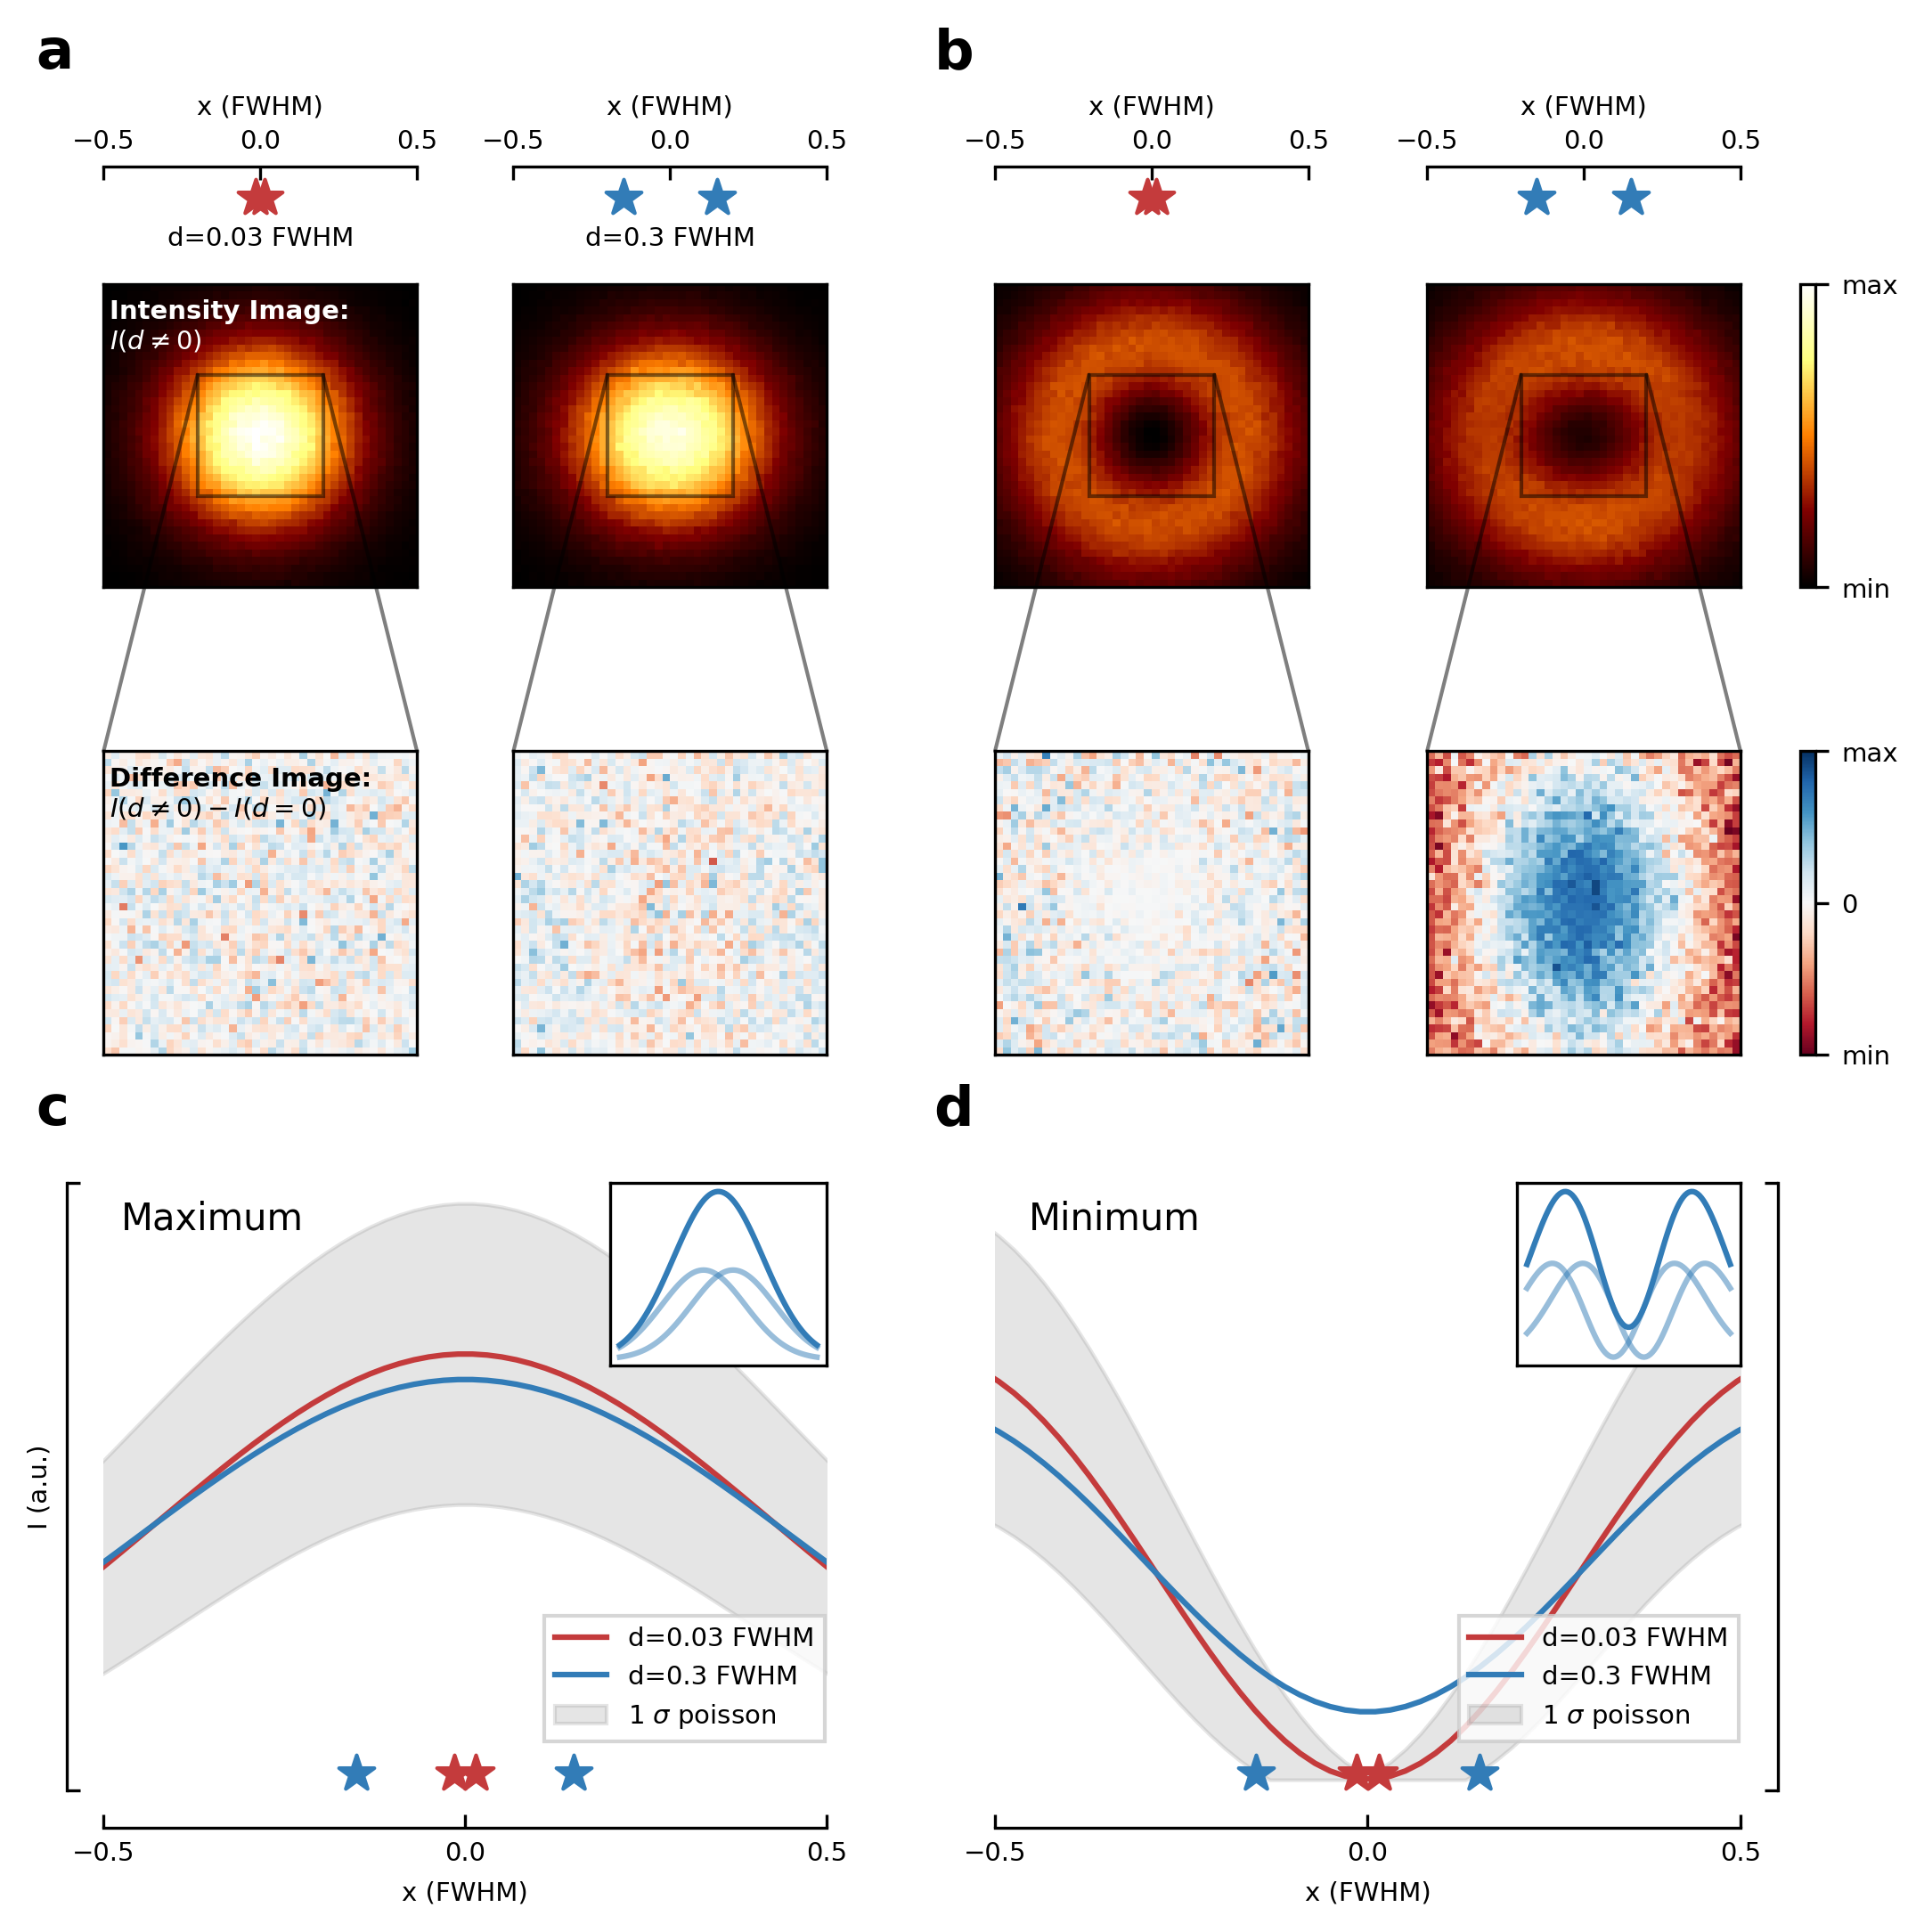

In [13]:
fig = DiffLimitFigure.make_figure(**kwargs)

Next, we create the theory figure of the paper, displaying the Cramer-Rao-Bound on the distance parameter, i.e. the localization precision of two point scatterers, localized with a diffraction minimum.

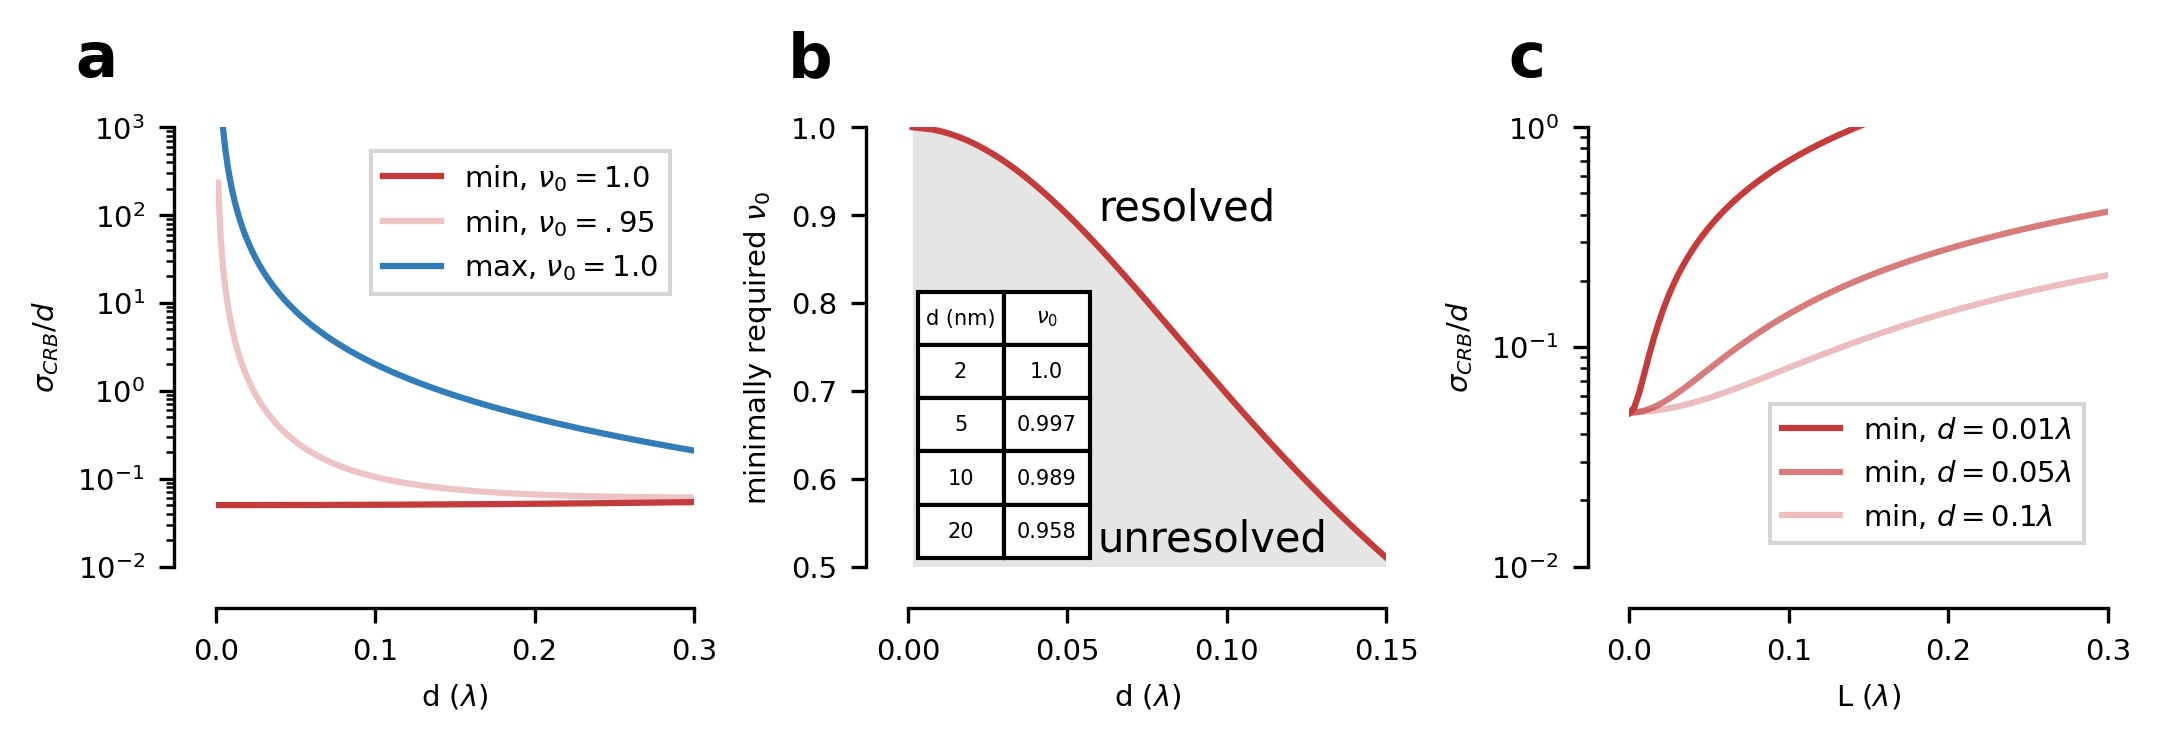

In [14]:

fig = CRBFigure.make_figure(**kwargs)

## Saving the output
Figures can be saved conveniently by calling the custom `save_fig` method. They will end up in your local `~/output/` directory.

In [15]:

Figures().save_fig(fig, 'ExampleFigure',out_path=out)
plt.close()
